Why do we get relatively fairer outcomes with DAC for the C1 scenarios?

In [2]:
import itertools
import pathlib
import pyam

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.cm as compile


import sys
sys.path.append('..')

sns.set_style('whitegrid')

# Read in the data

In [3]:
datapath = pathlib.Path('../../data')
fulldf = pyam.IamDataFrame(datapath / 'gidden_brutshin_et_al_2023_data.csv')
fulldf.load_meta(datapath / 'gidden_brutshin_et_al_2023_meta.csv')

pyam - INFO: Running in a notebook, setting up a basic logging at level INFO
pyam.core - INFO: Reading file ..\..\data\gidden_brutshin_et_al_2023_data.csv
pyam.core - INFO: Reading meta indicators


In [4]:
scens = pd.read_excel(datapath / 'scenarios.xlsx', sheet_name='equity_comparison')

In [5]:
equity_data = fulldf.filter(
    scenario=scens['Scenario']
)

# Focus on emission reductions and removals across the regions.

In [6]:
variables_of_interest = [
    'Emissions|CO2',
    'CDR'
]

In [7]:
deep_dive = equity_data.filter(
    variable=variables_of_interest
)

In [8]:
deep_dive.meta['Interp NZ Year World Emissions|CO2']

model              scenario                                                  
GENIE_SSP2_v4.1.7  EN_NPi2020-DACm-MP-median-stor3-final_1000                    2070
                   EN_NPi2020-DACm-MP-median-stor3-final_500                     2050
                   EN_NPi2020-DACm-MP-median-stor3-final_700                     2059
                   EN_NPi2020-DACm-MP-median-stor3-phs-govmSSP1-CO2total_1000    2070
                   EN_NPi2020-DACm-MP-median-stor3-phs-govmSSP1-CO2total_700     2055
                   EN_NPi2020-DACm-MP-median-stor3-phs-govmSSP2-CO2total_1000    2070
                   EN_NPi2020-stor3-final_1000                                   2080
                   EN_NPi2020-stor3-final_500                                    2055
                   EN_NPi2020-stor3-final_700                                    2060
Name: Interp NZ Year World Emissions|CO2, dtype: int64

In [9]:
maps = {
    '1.5C':500,
    '1.5C - OS':700,
    '2C':1000
}
for temp in ['1.5C', '1.5C - OS', '2C']:
    t = (
        deep_dive
        .filter(Temperature=temp)
        .meta['Cumulative Emissions|CO2 in Annex I until net-zero']
        .unstack()
    )
    display(
        (
            t.subtract(t[f'EN_NPi2020-stor3-final_{maps[temp]}'], axis=0)/1e3
        )
        .round(0)
    )

scenario,EN_NPi2020-DACm-MP-median-stor3-final_500,EN_NPi2020-stor3-final_500
model,,
GENIE_SSP2_v4.1.7,-3.0,0.0


scenario,EN_NPi2020-DACm-MP-median-stor3-final_700,EN_NPi2020-DACm-MP-median-stor3-phs-govmSSP1-CO2total_700,EN_NPi2020-stor3-final_700
model,,,
GENIE_SSP2_v4.1.7,-14.0,-36.0,0.0


scenario,EN_NPi2020-DACm-MP-median-stor3-final_1000,EN_NPi2020-DACm-MP-median-stor3-phs-govmSSP1-CO2total_1000,EN_NPi2020-DACm-MP-median-stor3-phs-govmSSP2-CO2total_1000,EN_NPi2020-stor3-final_1000
model,,,,
GENIE_SSP2_v4.1.7,-46.0,-51.0,-113.0,0.0


In [10]:
for temp in ['1.5C', '1.5C - OS', '2C']:
    t = (
        deep_dive
        .filter(Temperature=temp)
        .meta['Cumulative Emissions|CO2 in Africa until net-zero']
        .unstack()
    )
    display(
        (
            t.subtract(t[f'EN_NPi2020-stor3-final_{maps[temp]}'], axis=0)/1e3
        )
        .round(0)
    )

scenario,EN_NPi2020-DACm-MP-median-stor3-final_500,EN_NPi2020-stor3-final_500
model,,
GENIE_SSP2_v4.1.7,2.0,0.0


scenario,EN_NPi2020-DACm-MP-median-stor3-final_700,EN_NPi2020-DACm-MP-median-stor3-phs-govmSSP1-CO2total_700,EN_NPi2020-stor3-final_700
model,,,
GENIE_SSP2_v4.1.7,8.0,39.0,0.0


scenario,EN_NPi2020-DACm-MP-median-stor3-final_1000,EN_NPi2020-DACm-MP-median-stor3-phs-govmSSP1-CO2total_1000,EN_NPi2020-DACm-MP-median-stor3-phs-govmSSP2-CO2total_1000,EN_NPi2020-stor3-final_1000
model,,,,
GENIE_SSP2_v4.1.7,6.0,20.0,11.0,0.0


Split out gross emissions by subtracting CDR.

In [11]:
deep_dive.aggregate(
    variable='Emissions|CO2|Gross',
    components=[
        'Emissions|CO2',
        'CDR'
    ],
    append=True
)

In [12]:
regions_to_plot = [
    'Annex I',
    'Africa',
    'Latin America',
    'Asia',
    'China'
]

In [13]:
def get_from_meta_column(df, x, col):
    val = df.meta.loc[x.name[0:2], col]
    return val if val < np.inf else max(x.index)

In [14]:
regions_of_interest = ['World', 'Annex I', 'LAM', 'Africa', 'Asia', 'China']

Gross CO2 emissions: 2020 - net zero, net zero to 2100

In [15]:
gross_co2 = (
    deep_dive
    .filter(
        variable='Emissions|CO2|Gross',
        region=regions_of_interest
    )
    .timeseries()
)

In [16]:
gross_co2_2020_net_zero = (
    gross_co2.apply(
        lambda x: pyam.cumulative(
            x,
            first_year=2020,
            last_year=get_from_meta_column(deep_dive, x, 'Interp NZ Year World Emissions|CO2')
        ),
        axis=1
    )
    .reset_index()
    .rename(columns={0:'Cumulative Emissions|CO2 2020-netzero'})
    .assign(time='2020 - net-zero')
    .pivot_table(
        values='Cumulative Emissions|CO2 2020-netzero', 
        columns='region', 
        index=['model','scenario','variable', 'unit', 'time']
    )
)

In [17]:
gross_co2_net_zero_2100 = (
    gross_co2.apply(
        lambda x: pyam.cumulative(
            x,
            first_year=get_from_meta_column(deep_dive, x, 'Interp NZ Year World Emissions|CO2'),
            last_year=2100
        ),
        axis=1
    )
    .reset_index()
    .rename(columns={0:'Cumulative Emissions|CO2 netzero-2100'})
    .assign(time='netzero-2100')
    .pivot_table(
        values='Cumulative Emissions|CO2 netzero-2100', 
        columns='region', 
        index=['model','scenario','variable', 'unit', 'time']
    )
)

Now, we do this for the total CDR.

In [18]:
cdr = (
    deep_dive
    .filter(
        variable='CDR',
        region=regions_of_interest
    )
    .timeseries()
)

In [19]:
cdr_2020_net_zero = (
    cdr.apply(
        lambda x: pyam.cumulative(
            x,
            first_year=2020,
            last_year=get_from_meta_column(deep_dive, x, 'Interp NZ Year World Emissions|CO2')
        ),
        axis=1
    )
    .reset_index()
    .rename(columns={0:'Cumulative CDR 2020-netzero'})
    .assign(time='2020 - net-zero')
    .pivot_table(
        values='Cumulative CDR 2020-netzero', 
        columns='region', 
        index=['model','scenario','variable', 'unit', 'time']
    )
)

In [20]:
cdr_net_zero_2100 = (
    cdr.apply(
        lambda x: pyam.cumulative(
            x,
            first_year=get_from_meta_column(deep_dive, x, 'Interp NZ Year World Emissions|CO2'),
            last_year=2100
        ),
        axis=1
    )
    .reset_index()
    .rename(columns={0:'Cumulative CDR netzero-2100'})
    .assign(time='netzero-2100')
    .pivot_table(
        values='Cumulative CDR netzero-2100', 
        columns='region', 
        index=['model','scenario','variable', 'unit', 'time']
    )
)

In [21]:
all_emi = pd.concat([gross_co2_2020_net_zero, gross_co2_net_zero_2100, cdr_2020_net_zero, cdr_net_zero_2100])

In [22]:
shares = all_emi.div(all_emi.World, axis=0) * 100

In [23]:
shares.to_excel('SHARES.xlsx')
all_emi.to_excel('TOTAL.xlsx')

First, let us make some plots to look through what happens until net zero CO2

In [24]:
deep_dive.meta.Temperature

model              scenario                                                  
GENIE_SSP2_v4.1.7  EN_NPi2020-DACm-MP-median-stor3-final_1000                           2C
                   EN_NPi2020-DACm-MP-median-stor3-final_500                          1.5C
                   EN_NPi2020-DACm-MP-median-stor3-final_700                     1.5C - OS
                   EN_NPi2020-DACm-MP-median-stor3-phs-govmSSP1-CO2total_1000           2C
                   EN_NPi2020-DACm-MP-median-stor3-phs-govmSSP1-CO2total_700     1.5C - OS
                   EN_NPi2020-DACm-MP-median-stor3-phs-govmSSP2-CO2total_1000           2C
                   EN_NPi2020-stor3-final_1000                                          2C
                   EN_NPi2020-stor3-final_500                                         1.5C
                   EN_NPi2020-stor3-final_700                                    1.5C - OS
Name: Temperature, dtype: object

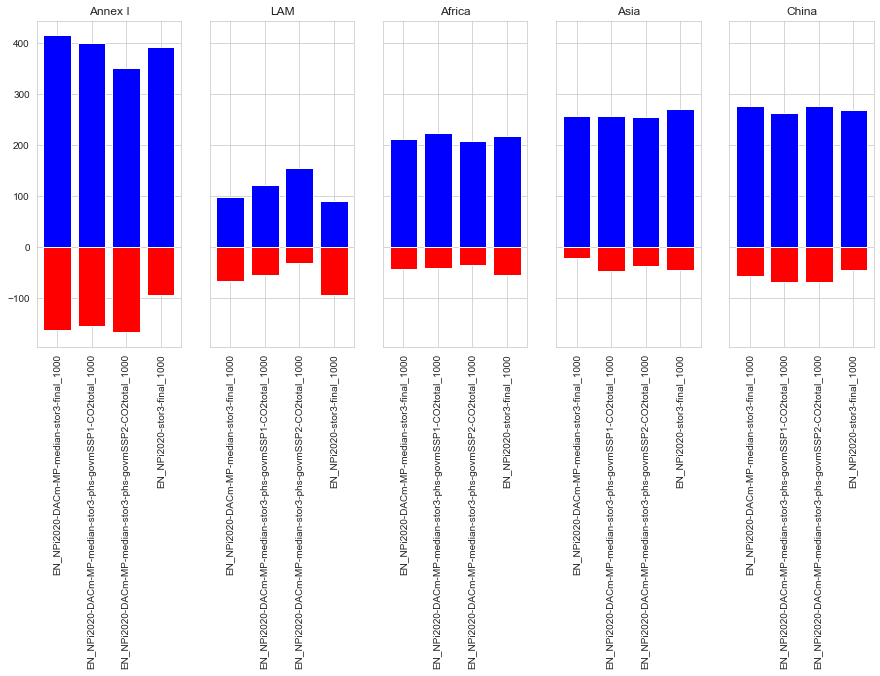

In [25]:
fig, ax = plt.subplots(1, 5, figsize=(15, 6), sharey=True)

for i,temp in enumerate(['2C']): #, '1.5C - OS', '2C']):
    for j, region in enumerate(['Annex I', 'LAM', 'Africa', 'Asia', 'China']):
        plot_data = all_emi.loc[pd.IndexSlice[:, deep_dive.filter(Temperature=temp).scenario, :, :, '2020 - net-zero'], region]
        labs=[]
        for k, scen in enumerate(plot_data.index.get_level_values('scenario').unique()):
            labs.append(scen)
            for var in ['Emissions|CO2|Gross', 'CDR']:
                d = plot_data.loc[pd.IndexSlice[:,scen, var,:,:]].values[0] / 1e3
                col='blue'
                if var == 'CDR':
                     d*=-1
                     col='red'
                ax[j].bar(
                    x=k,
                    height=d,
                    color=col
                )
        ax[j].set_title(region)
        ax[j].set_xticks(range(k+1))
        ax[j].set_xticklabels(labs, rotation=90)


# Supplementary figures

South and South East asia in C2 - C3 pathways?

c:\users\gidden\onedrive - iiasa\work\iiasa\pyam\pyam\plotting.py:1073: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for col, data in df.iteritems():


<AxesSubplot:title={'center':'model: GENIE_SSP2_v4.1.7 - region: Asia - variable: Emissions|CO2'}, xlabel='Year', ylabel='Mt CO2/yr'>

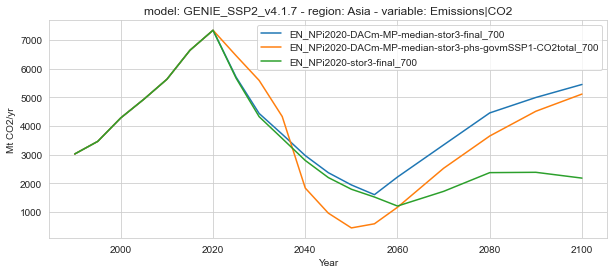

In [26]:
fig, ax = plt.subplots(figsize=(10,4))

deep_dive.filter(
    Temperature='1.5C - OS',
    region='Asia',
    variable='Emissions|CO2'
).plot(color='scenario', ax=ax)

In [27]:
fig.savefig('SI_fig_equity.png')

CDR distributions.

In [28]:
shares.loc[pd.IndexSlice[:,:,'CDR',:,'netzero-2100']].round(0)

region                                                                          Africa  \
model             scenario                                           unit                
GENIE_SSP2_v4.1.7 EN_NPi2020-DACm-MP-median-stor3-final_1000         Mt CO2/yr    21.0   
                  EN_NPi2020-DACm-MP-median-stor3-final_500          Mt CO2/yr    20.0   
                  EN_NPi2020-DACm-MP-median-stor3-final_700          Mt CO2/yr    23.0   
                  EN_NPi2020-DACm-MP-median-stor3-phs-govmSSP1-CO... Mt CO2/yr    22.0   
                  EN_NPi2020-DACm-MP-median-stor3-phs-govmSSP1-CO... Mt CO2/yr    17.0   
                  EN_NPi2020-DACm-MP-median-stor3-phs-govmSSP2-CO... Mt CO2/yr    16.0   
                  EN_NPi2020-stor3-final_1000                        Mt CO2/yr    18.0   
                  EN_NPi2020-stor3-final_500                         Mt CO2/yr    19.0   
                  EN_NPi2020-stor3-final_700                         Mt CO2/yr    19.0   

region                                                                          Annex I  \
model             scenario                                           unit                 
GENIE_SSP2_v4.1.7 EN_NPi2020-DACm-MP-median-stor3-final_1000         Mt CO2/yr     47.0   
                  EN_NPi2020-DACm-MP-median-stor3-final_500          Mt CO2/yr     44.0   
                  EN_NPi2020-DACm-MP-median-stor3-final_700          Mt CO2/yr     42.0   
                  EN_NPi2020-DACm-MP-median-stor3-phs-govmSSP1-CO... Mt CO2/yr     43.0   
                  EN_NPi2020-DACm-MP-median-stor3-phs-govmSSP1-CO... Mt CO2/yr     46.0   
                  EN_NPi2020-DACm-MP-median-stor3-phs-govmSSP2-CO... Mt CO2/yr     56.0   
                  EN_NPi2020-stor3-final_1000                        Mt CO2/yr     26.0   
                  EN_NPi2020-stor3-final_500                         Mt CO2/yr     25.0   
                  EN_NPi2020-stor3-final_700                         Mt CO2/yr     25.0   

region                                                                          Asia  \
model             scenario                                           unit              
GENIE_SSP2_v4.1.7 EN_NPi2020-DACm-MP-median-stor3-final_1000         Mt CO2/yr   4.0   
                  EN_NPi2020-DACm-MP-median-stor3-final_500          Mt CO2/yr   6.0   
                  EN_NPi2020-DACm-MP-median-stor3-final_700          Mt CO2/yr   6.0   
                  EN_NPi2020-DACm-MP-median-stor3-phs-govmSSP1-CO... Mt CO2/yr   7.0   
                  EN_NPi2020-DACm-MP-median-stor3-phs-govmSSP1-CO... Mt CO2/yr   7.0   
                  EN_NPi2020-DACm-MP-median-stor3-phs-govmSSP2-CO... Mt CO2/yr   6.0   
                  EN_NPi2020-stor3-final_1000                        Mt CO2/yr  13.0   
                  EN_NPi2020-stor3-final_500                         Mt CO2/yr  14.0   
                  EN_NPi2020-stor3-final_700                         Mt CO2/yr  13.0   

region                                                                          China  \
model             scenario                                           unit               
GENIE_SSP2_v4.1.7 EN_NPi2020-DACm-MP-median-stor3-final_1000         Mt CO2/yr    8.0   
                  EN_NPi2020-DACm-MP-median-stor3-final_500          Mt CO2/yr    7.0   
                  EN_NPi2020-DACm-MP-median-stor3-final_700          Mt CO2/yr    8.0   
                  EN_NPi2020-DACm-MP-median-stor3-phs-govmSSP1-CO... Mt CO2/yr    9.0   
                  EN_NPi2020-DACm-MP-median-stor3-phs-govmSSP1-CO... Mt CO2/yr    9.0   
                  EN_NPi2020-DACm-MP-median-stor3-phs-govmSSP2-CO... Mt CO2/yr   10.0   
                  EN_NPi2020-stor3-final_1000                        Mt CO2/yr   12.0   
                  EN_NPi2020-stor3-final_500                         Mt CO2/yr   12.0   
                  EN_NPi2020-stor3-final_700                         Mt CO2/yr   12.0   

region                                                    